<!-- # Copyright (c) 2025 takotime808 -->
# Coverage Plot Demo for Single and Multi-Output Regression

This notebook shows how to use the `plot_coverage` function from `multioutreg/figures/coverage_plots.py` for:
- **Single-output regression**
- **Multi-output regression**

We simulate data and predictive standard deviations for demonstration.

---
### Imports ###


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from multioutreg.figures.coverage_plots import (
    plot_coverage,
)

<!-- # Copyright (c) 2025 takotime808 -->

### 1. Single-Output Regression Example ###

Let's fit a simple regression, simulate uncertainties, and plot coverage.



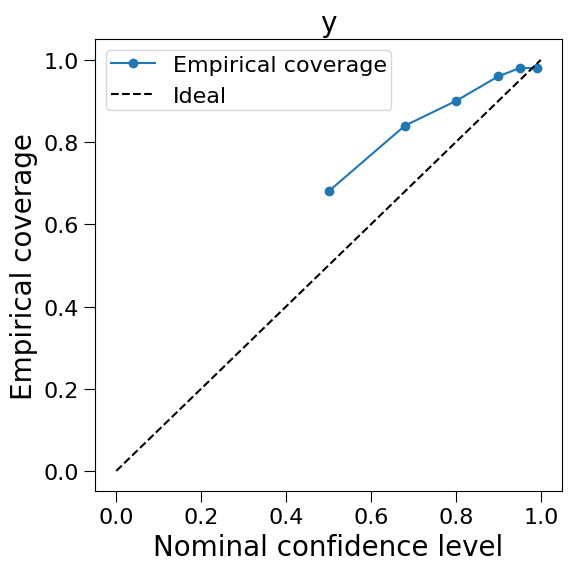

In [2]:
# Simulate data
rng = np.random.RandomState(0)
X = rng.rand(200, 3)
y = 3 * X[:, 0] - 2 * X[:, 1] + 0.5 * X[:, 2] + rng.normal(0, 0.5, size=200)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Simulate predictive stddev (here, just for demonstration)
y_std = np.full_like(y_pred, 0.6)

# Plot coverage
plot_coverage(y_true=y_test, y_pred=y_pred, y_std=y_std, output_names=["y"])


<!-- # Copyright (c) 2025 takotime808 -->

### 2. Multi-Output Regression Example ###

Now for a multi-output case.



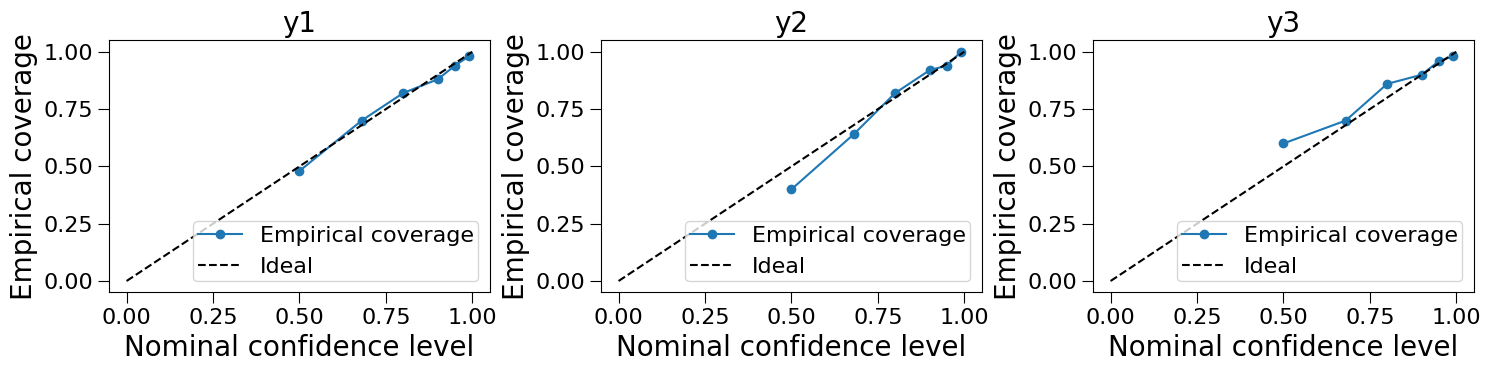

In [3]:
from sklearn.multioutput import MultiOutputRegressor

# Simulate multi-output data
y_multi = np.stack([
    2*X[:, 0] + rng.normal(0, 0.7, size=200),
    -X[:, 1] + 0.3*X[:, 2] + rng.normal(0, 0.3, size=200),
    1.5*X[:, 0] - X[:, 1] + rng.normal(0, 0.5, size=200)
], axis=1)

# Train-test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y_multi, random_state=2)

# Fit model
reg_multi = MultiOutputRegressor(LinearRegression()).fit(X_tr, y_tr)
y_pred_multi = reg_multi.predict(X_te)

# Simulate predictive stddevs for each output
y_std_multi = np.full_like(y_pred_multi, [0.7, 0.3, 0.5])

# Plot coverage
plot_coverage(
    y_true=y_te,
    y_pred=y_pred_multi,
    y_std=y_std_multi,
    output_names=["y1", "y2", "y3"]
)


<!-- # Copyright (c) 2025 takotime808 -->

## Summary ##

- Use `plot_coverage` for both single and multi-output models.
- Pass `y_true`, `y_pred`, and `y_std` as arrays.
- For real applications, use model-based predictive uncertainties (e.g., from Bayesian regressors).
